In [1]:
# Import module
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets

from copy import deepcopy
from itertools import product
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from train_tools import TrainHelper
from model_task2c import PR_CNN

In [2]:
# load data
TRAIN_DATASET = "./../data/png/mnist/train"
VALIDATION_DATASET = "./../data/png/mnist/val"
TEST_DATASET = "./../data/png/mnist/test"

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.ImageFolder(root=TRAIN_DATASET,
                                     transform=transform)
val_dataset = datasets.ImageFolder(root=VALIDATION_DATASET,
                                     transform=transform)
test_dataset = datasets.ImageFolder(root=TEST_DATASET,
                                     transform=transform)

params = {'batch_size': 64,
          'shuffle': True}

train_loader = torch.utils.data.DataLoader(train_dataset, **params)
val_loader = torch.utils.data.DataLoader(val_dataset, **params)
test_loader = torch.utils.data.DataLoader(test_dataset, **params)

In [3]:
def plot_graph(nb_epochs, train, val, step):
    plt.figure()
    plt.plot(np.arange(nb_epochs), train)
    plt.plot(np.arange(nb_epochs), val)
    plt.legend(['training', 'validation'])
    plt.xlabel('epoch')
    plt.ylabel(f'{step} value')
    plt.title(f'Train/val {step}');
        
    plt.show()

learning rate: 0.1
Train_loss: 0.066 |                Val_loss: 0.091 |                Train_acc: 98.055 |                Val_acc: 97.253
learning rate: 0.01
Train_loss: 0.253 |                Val_loss: 0.374 |                Train_acc: 92.756 |                Val_acc: 88.111
learning rate: 0.001
Train_loss: 0.450 |                Val_loss: 0.443 |                Train_acc: 87.336 |                Val_acc: 87.879


Best parameters: 0.1 learning_rate and validation accuracies: 97.25%


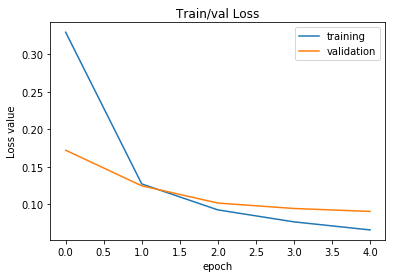

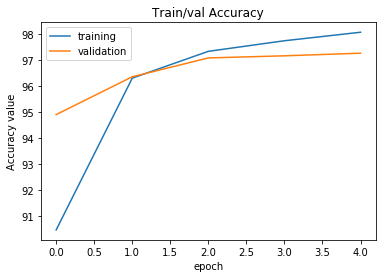

In [4]:
l_rates = [1*10**-i for i in range(1, 4)]
nb_epochs = 5
trainer = TrainHelper(nb_epochs)

# best parameters: (validation acc, learning rate)
best_parameters = (float("-INF"), None, None)
# keep a copy of the best trained network
best_model = None

loss_function = nn.CrossEntropyLoss()

for l_rate in l_rates:
    neural_net = PR_CNN()
    optimizer = torch.optim.SGD(neural_net.parameters(), l_rate)
    
    print(f'learning rate: {l_rate}')
    stats_training = trainer.fit(neural_net,
                            train_loader,
                            val_loader,
                            optimizer,
                            loss_function)
    
    if stats_training[3][-1] > best_parameters[0]:
        best_parameters = (stats_training[3][-1], l_rate, stats_training)
        best_model = deepcopy(neural_net)

best_acc, best_l_rate, best_stats = best_parameters
train_losses, val_losses, train_accuracies, val_accuracies = best_stats

print(f'\n\nBest parameters: {best_l_rate} learning_rate and validation accuracies: {best_acc:.2f}%')

plot_graph(nb_epochs, train_losses, val_losses, "Loss")
plot_graph(nb_epochs, train_accuracies, val_accuracies, "Accuracy")

In [5]:
loss_test, acc_test = trainer.validation(best_model, test_loader, loss_function)
print(f'Accuracy on the test dataset {acc_test:.2f}%')

Accuracy on the test dataset 97.75%
